### Les inn csv-filer
Vi bruker seklima.no til å laste ned data vi kan se på i sammenheng med selvinnhentede data over nedbør og temperatur. 


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

Pass på at backslashene går rett vei. Dette er windows din default: \. Det blir feil. Vi må bruke denne: /. Eventuelt kan vi skrive en dobbel windows slash: \\, eller sette en 'r' foran stien. Det er best standard å bruke unix syntax, altså /.

In [10]:
sti='W:/Work/Documents/EkteData/EkteData'
fil='/soltimer.csv'

sti='W:\\Work\\Documents\\EkteData\\EkteData'
fil='\\soltimer.csv'

sti=r'W:\Work\Documents\EkteData\EkteData'
fil='\soltimer.csv'

Bruk pandas til å lese csv-filen. `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. Med `index_col` bestemmer du hvilken kolonne du vil sette til venstre og bruke som index. `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må komma endres til punktum. 

In [55]:
df = pd.read_csv(
    sti+fil, sep=';', index_col='Tid(norsk normaltid)', decimal=','
)

df er nå en "Pandas DataFrame"

In [56]:
df

,Navn,Stasjon,Solskinnstid (døgn)
Tid(norsk normaltid),,,
29.12.2021,Flesland,SN50500,0.9
30.12.2021,Flesland,SN50500,0.0
31.12.2021,Flesland,SN50500,0.0
01.01.2022,Flesland,SN50500,0.0
04.01.2022,Flesland,SN50500,0.0
NaN,"Data er gyldig per 04.01.2022 (CC BY 4.0), Met...",NaN,NaN


Hvis du nå vil ha tak i f.eks. kun verdien for Solskinnstid skriver du slik:


In [57]:
df['Solskinnstid (døgn)'][0]

0.9

In [58]:
df['Solskinnstid (døgn)']

Tid(norsk normaltid)
29.12.2021    0.9
30.12.2021    0.0
31.12.2021    0.0
01.01.2022    0.0
04.01.2022    0.0
NaN           NaN
Name: Solskinnstid (døgn), dtype: float64

Hvis vi vil plotte disse dataene må vi i dette tilfellet ta vekk den siste linjen med informasjon. 

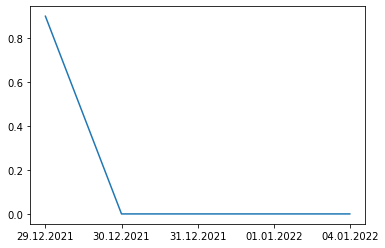

In [59]:
plt.plot(df['Solskinnstid (døgn)'][:-1])
plt.show()

Vi kan også redefinere df så vi slipper å tenke på denne siste linjen. I panda DataFrames angir man navnet til kolonnen først, og så hvilke rader man vil se på. Dette er litt forvirrende siden standard indeksering bruker "row" så "column". `df[:][:-1]` betyr altså "alle kolonner" (`[:]`), og "alle rader utenom den siste" (`[:-1]`).

In [60]:
df=df[:][:-1]

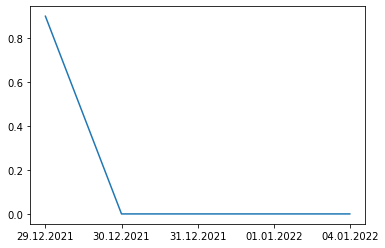

In [61]:
plt.plot(df['Solskinnstid (døgn)'])
plt.show()

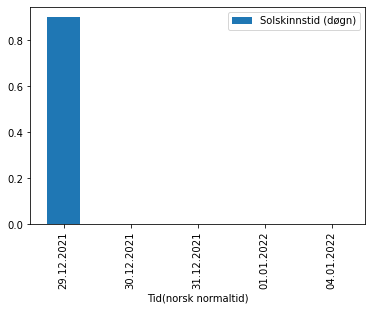

In [64]:
df.plot(kind='bar', y='Solskinnstid (døgn)')
plt.show()